# Relationship between an Airbnb's price and its reviews-per-month in New York City: Modeling the demand curve in NYC's Airbnb market

# Project 1
## Introducton
Airbnb is a website that run as a platform for short-term house or room rental information. It represents the idea of "sharing economics" by making the host make profit from their spare room or house, and providing more choice for travellers to choose their short-term residence. 

This report aim to find the relationship between an Airbnb's price and its average monthly review amount in New York City. For an Airbnb, the `reviews_per_month` reflect its popuparity and amount of deals. If an Airbnb with higher monthly review average, it is considered as the choice for more travellers, which reflect its greater market and popularity among travellers. By analize the relationship between `review_per_month` and `price`, this project indicates whether a lower price is what people looking for in sharing economics. 

This project is not only helpful for house hosts to adjust price and make greater profit, but also provide information for travellers choosing short-term residence based on their travelling budget. Beside `prices` and `reviews_per_month`, the dataset introduced in this report also contains information such as each Airbnb's location(neighbourhood, latitude, longitude), room type, popularity(minimum guest living night, amount and frequency of guest review), and availability in a year. The price of each Airbnb is considered as the dependent variable, `reviews_per_month` is consider as the main independent variables, while other features in the dataset are only considered for further analysis. 

## Data Cleaning
First, the original data was transformed into a dataframe. There are 48895 samples in the dataset.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(pd.read_csv('AB_NYC_2019.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Missing values in `last_review` and `reviews_per_month` are considered as the representation of Airbnb closing or not approachable by guests, thus samples missing these two values will be not considered in this anlaysis. Missing value in `name` and `name_host` will be set as `NaN` since they won't affect the correlation between price and average monthly review. After these process, there are 38843 samples remains for analysing.

In [18]:
df = df.dropna(subset=['last_review','reviews_per_month'])
df.replace('', np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38843 non-null  int64  
 1   name                            38837 non-null  object 
 2   host_id                         38843 non-null  int64  
 3   host_name                       38827 non-null  object 
 4   neighbourhood_group             38843 non-null  object 
 5   neighbourhood                   38843 non-null  object 
 6   latitude                        38843 non-null  float64
 7   longitude                       38843 non-null  float64
 8   room_type                       38843 non-null  object 
 9   price                           38843 non-null  int64  
 10  minimum_nights                  38843 non-null  int64  
 11  number_of_reviews               38843 non-null  int64  
 12  last_review                     

## Numerical Variables Analysis
There are both numerical variables and categorical variables in the dataframe. Since both `price` and `reviews_per_month` are numerical, this report is going to start with numerical analysis.

In [19]:
df.rename(columns={"price": "price(in USD)"}, inplace = True)
df["price(in USD)"].describe()

count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price(in USD), dtype: float64

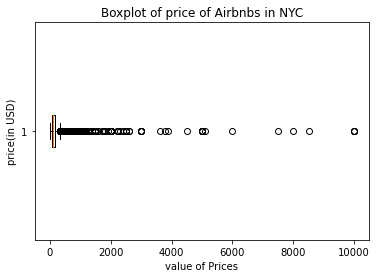

In [20]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(df['price(in USD)'],vert = False)

ax.set_title('Boxplot of price of Airbnbs in NYC')
ax.set_xlabel('value of Prices')
ax.set_ylabel('price(in USD)')
plt.show()

*Figure 1-1: Boxplot of price(in USD) of Airbnbs in NYC*

Genrally, the price of Airbnb in NYC has an average of 142.32USD and has median of 101USD. Through the graph, even the price varies between 0USD and 10,000USD, the majority of investigated Airbnbs have a price that is less than 3000USD. 

In [21]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

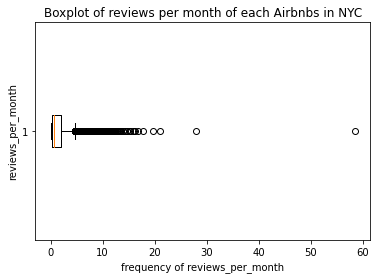

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(df['reviews_per_month'],vert = False)

ax.set_title('Boxplot of reviews per month of each Airbnbs in NYC')
ax.set_xlabel('frequency of reviews_per_month')
ax.set_ylabel('reviews_per_month')

plt.show()

*Figure 1-2: Boxplot of reviews per month of each Airbnbs in NYC*

An Airbnb has 1.37 reviews per month on average, and the median amount of review per month is 0.72. Through the boxplot, there is a great difference between each Airbnb's `review_per_month`. There are certain amount of Airbnbs that have around or above 5 reveiws on average per month. 

In [23]:
df.corr()

,id,host_id,latitude,longitude,price(in USD),minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.591529,-0.010013,0.103150,-0.006647,-0.073902,-0.329865,0.291828,0.098482,0.006430
host_id,0.591529,1.000000,0.012946,0.141095,0.006269,-0.051693,-0.141819,0.296417,0.149412,0.155082
latitude,-0.010013,0.012946,1.000000,0.088152,0.031318,0.024808,-0.008746,-0.010142,0.004326,-0.022228
longitude,0.103150,0.141095,0.088152,1.000000,-0.155361,-0.055418,0.054681,0.145948,-0.093325,0.102540
price(in USD),-0.006647,0.006269,0.031318,-0.155361,1.000000,0.025506,-0.035938,-0.030608,0.052903,0.078234
minimum_nights,-0.073902,-0.051693,0.024808,-0.055418,0.025506,1.000000,-0.069368,-0.121702,0.073479,0.101686
number_of_reviews,-0.329865,-0.141819,-0.008746,0.054681,-0.035938,-0.069368,1.000000,0.549868,-0.059784,0.193557
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.098482,0.149412,0.004326,-0.093325,0.052903,0.073479,-0.059784,-0.009421,1.000000,0.182911
availability_365,0.006430,0.155082,-0.022228,0.102540,0.078234,0.101686,0.193557,0.185791,0.182911,1.000000


Thorugh the correlation between price and other numerical descriptive variables, `id` and `host_id` are less correlated with price. The price of an Airbnb is slightly positively correlated with `latitude`,`minimum_nights`, `calculated_host_listings_count` and `availability_365`, and is slightly negatively correlated with `longitude` and `number_of_reviews`. 

## Categorical Analysis

Since the type of room might have effect on price for an Airbnb, the dataset is grouped based on `room_type`, and statistics of prices of each group is shown below.

In [24]:
df.groupby('room_type')['price(in USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,20332.0,196.294068,223.646417,0.0,116.0,151.0,220.0,10000.0
Private room,17665.0,83.981093,142.238423,0.0,50.0,70.0,94.0,10000.0
Shared room,846.0,63.213948,95.186458,0.0,32.0,45.0,70.0,1800.0


Text(0.5, 0.98, '')

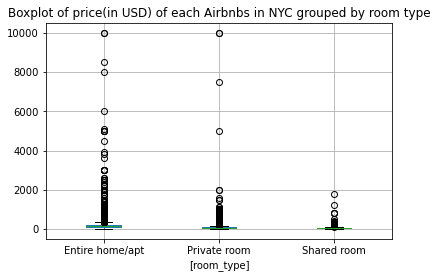

In [25]:
df.boxplot(column = ['price(in USD)'],by = ['room_type'])
plt.title('Boxplot of price(in USD) of each Airbnbs in NYC grouped by room type')
plt.suptitle('')

*Figure1-3: Boxplot of Airbnb's price for each types of room*

Through the data, most of the investigated Airbnbs are entire home/apt. Shared room are the least and only have 846 samples. 

Entire home/apt has the highest average price of 196.29USD, and also the highest median of 151USD. Shared room has the lowest average price of 63.21USD, as well as the lowest median of 45USD. There are more samples of entire home/apt has price above or around 5000USD than private rooms. Shared room has the lowest upper price limit, which is 1800USD. 

In [26]:
df_rt = df[['price(in USD)','reviews_per_month','room_type']]
df_rt.groupby('room_type').corr()

price(in USD)  reviews_per_month
room_type                                                          
Entire home/apt price(in USD)           1.000000          -0.024870
                reviews_per_month      -0.024870           1.000000
Private room    price(in USD)           1.000000          -0.011623
                reviews_per_month      -0.011623           1.000000
Shared room     price(in USD)           1.000000          -0.082657
                reviews_per_month      -0.082657           1.000000

After divide the dataset into three groups based on the `room_type`, the relationship between price and `reviews_per_month` are still negative in each group. However, the negative relationship is stronger for shared rooms(greater absolute value for the correlation value), which means that a shared room with greater averge review per month is more likely to have lower price. 

Between different neighbourhood, location effects are added for further analysis of price.`neighbourhood_group` is the categorical variales that effect the price.  

Text(0.5, 0.98, '')

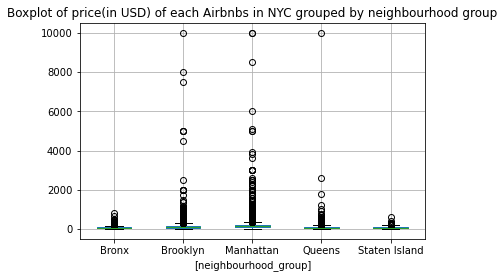

In [27]:
df.boxplot(column = ['price(in USD)'],by = ['neighbourhood_group'])
plt.title('Boxplot of price(in USD) of each Airbnbs in NYC grouped by neighbourhood group')
plt.suptitle('')

*Figure 1-4: Boxplot of Airbnb's price in each neighbourhood group.*

After divided Airbnbs into subgroups based on thier neighbourhood group, `Manhattan` has the greatest amout of Airbnbs samples while `Staten Island` has the samllest amout. 

Comparing between each neighbourhood group, Airbnbs in `Manhattan` on average has the highest price of 180.05USD and has the highest median of 140USD. Airbnbs in `Bronx` has the lowest average price of 79.55USD, and also the lowest median of 65USD. However, Airbnbs with the highest price of 10,000USD are located in `Brooklyn` and `Queens` instead of `Manhattan`. 

In [28]:
df_nhg = df[['price(in USD)','reviews_per_month','neighbourhood_group']]
df_nhg.groupby('neighbourhood_group').corr()

price(in USD)  reviews_per_month
neighbourhood_group                                                    
Bronx               price(in USD)           1.000000          -0.010145
                    reviews_per_month      -0.010145           1.000000
Brooklyn            price(in USD)           1.000000          -0.015384
                    reviews_per_month      -0.015384           1.000000
Manhattan           price(in USD)           1.000000          -0.011276
                    reviews_per_month      -0.011276           1.000000
Queens              price(in USD)           1.000000          -0.039568
                    reviews_per_month      -0.039568           1.000000
Staten Island       price(in USD)           1.000000          -0.102423
                    reviews_per_month      -0.102423           1.000000

After divide the dataset into three groups based on the `neighbourhood_group`, the relationship between price and `reviews_per_month` are still negative in each group. However, the negative relationship is stronger for Queens(greater absolute value for the correlation value), which means that an Airbnb in Queens with greater averge review per month is more likely to have lower price. 

# Project 2
## THE MESSAGE
As mentioned in the introduction, This report aim to find the relationship between an Airbnb's price and its average monthly review amount in New York City. There are some Airbnbs have luxuery prices. Since this report aims to provide more information for most travellers and hosts that face to short-term travellers, only Airbnbs with price lower than 500USD will be considered for further analysis. 

After analizing the relationship between all possible independent variables in the dataset and `prices`, we want to sepecificly further the analysis of relationship between Airbnbs' prices and an airbnb's `reviews_per_month`. Furthermore we will use `room_type` and `neighbourhood_group` to divide the data into subgroups for further analysis.

A negative relationship between an Airbnb's price and it's popularity(reflected by `reviews_per_month`) is shown since travellers might prefer a more economics price while travelling. In comparison with `Shared room`, `Private room` are expected to have higher price due to privacy protection cost,`Entire home/apt` are also expected to have higher price since this kind of rooms are possibly to have greater area. Since `Manhattan` is a populor travelling destination, the price of Airbnbs over there is expected to be higher than other `neighbourhood_group`.  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38107 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38107 non-null  int64  
 1   name                            38101 non-null  object 
 2   host_id                         38107 non-null  int64  
 3   host_name                       38091 non-null  object 
 4   neighbourhood_group             38107 non-null  object 
 5   neighbourhood                   38107 non-null  object 
 6   latitude                        38107 non-null  float64
 7   longitude                       38107 non-null  float64
 8   room_type                       38107 non-null  object 
 9   price(in USD)                   38107 non-null  int64  
 10  minimum_nights                  38107 non-null  int64  
 11  number_of_reviews               38107 non-null  int64  
 12  last_review                     

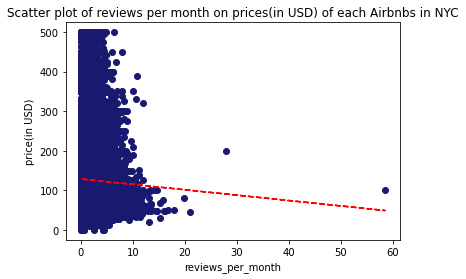

In [29]:
df.rename(columns={"price(in USD)": "price"}, inplace = True)
df2 = df[df.price < 500]
df2.rename(columns={"price": "price(in USD)"}, inplace = True)
print(df2.info())

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df2['reviews_per_month'], df2['price(in USD)'], color = 'midnightblue')

z = np.polyfit(df2['reviews_per_month'], df2['price(in USD)'], 1)
p = np.poly1d(z)
ax.plot(df2['reviews_per_month'],p(df2['reviews_per_month']),"r--")

ax.set_title('Scatter plot of reviews per month on prices(in USD) of each Airbnbs in NYC')
ax.set_xlabel('reviews_per_month')
ax.set_ylabel('price(in USD)')
plt.show()

*Figure 2-1: Scatter plot of reviews per month on prices of each Airbnbs in NYC*

The negative relationship between `price` and `reviews_per_month` indicates that for an Airbnb with a higher price, it usually has less review. Also, an Airbnb with less reviews per month is also likely to have higher price. For further analysis, we are going to divide the dataset into subgroups. 

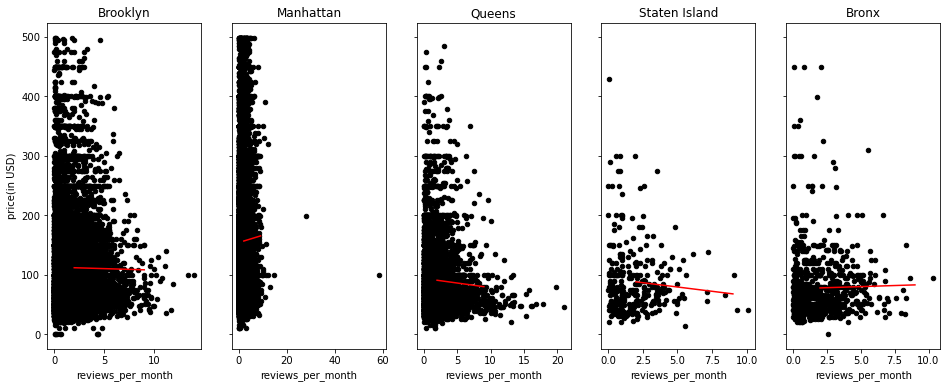

In [30]:
from sklearn.linear_model import LinearRegression
def single_scatter_plot(df,neighbourhood_group, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(neighbourhood_group == @neighbourhood_group) ")
    _df.plot(
        kind="scatter", x="reviews_per_month", y="price(in USD)", ax=ax, color=color, s=20
    )
    
    lr = LinearRegression()
    X = _df["reviews_per_month"].values.reshape(-1, 1)
    y = _df["price(in USD)"].values.reshape(-1, 1)
    lr.fit(X, y)

    x = np.linspace(2.0, 9.0).reshape(-1, 1)
    y_pred = lr.predict(x)
    ax.plot(x, y_pred, color='red')
    
    return ax

fig, ax = plt.subplots(1, 5, figsize=(16, 6), sharey=True)

for (i, neighbourhood_group) in enumerate(df2['neighbourhood_group'].unique()):
    single_scatter_plot(df2,neighbourhood_group, ax[i], "black")
    ax[i].set_title(str(neighbourhood_group))

*Figure 2-2: Scatter plot of reviews per month on prices(in USD) of each Airbnbs in each neighbourhood group.*

This graph in dicates how `price` varies with `reviews_per_month` in each `neighbourhood_group`. Mostly `price` are negatively related with `reviews_per_month` in other `neighbourhood_group`. However, in `Manhatten` Airbnbs with higher `reviews_per_month` are expected to have higher price. 

Text(6, 10, 'Shared room')

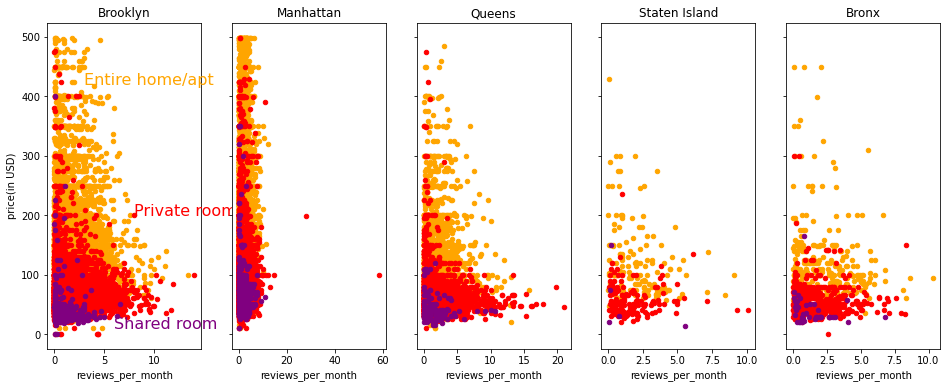

In [31]:
def single_scatter_plot(df,neighbourhood_group, room_type, ax, color):
    """
    This function creates a single year's and education level's
    log density to log wage plot
    """
    # Filter data to keep only the data of interest
    _df = df.query("(neighbourhood_group == @neighbourhood_group) & (room_type == @room_type)")
    _df.plot(
        kind="scatter", x="reviews_per_month", y="price(in USD)", ax=ax, color=color, s=20
    )
    
    
    return ax

fig, ax = plt.subplots(1,5,figsize=(16, 6), sharey=True,)

for (i, neighbourhood_group) in enumerate(df2['neighbourhood_group'].unique()):
    single_scatter_plot(df2,neighbourhood_group, "Entire home/apt", ax[i], "orange")
    single_scatter_plot(df2,neighbourhood_group, "Private room", ax[i], "red")
    single_scatter_plot(df2,neighbourhood_group, "Shared room", ax[i], "purple")
    ax[i].set_title(str(neighbourhood_group))
    
ax[0].annotate("Entire home/apt", (3,420), color='orange',fontsize = 16)
ax[0].annotate("Private room", (8,200), color='red',fontsize = 16)
ax[0].annotate("Shared room", (6,10), color='purple', fontsize = 16)

*Figure 2-3: Scatter plot of reviews per month on prices(in USD) of each Airbnbs in each neighbourhood group differed by room type.*

In this graph, Airbnb with each `room_type`has different color. It is easy to observed that in each `neighbourhood_group`, `Entire home/apt` generally have a higher price, and `Shared room` gennerally have lower price. Also, even `Private room` usually have a price between `Entire home/apt` and `Shared room`, it usualy have the highest `reviews_per_month` among three types of rooms except for `Bronx`. 

In [36]:
import geopandas as gpd
from shapely import wkt
import seaborn as sns

from shapely.geometry import Point

%matplotlib inline
import qeds
qeds.themes.mpl_style();

nyc = gpd.read_file(gpd.datasets.get_path('nybb'))

In [37]:
df2["Coordinates"] = list(zip(df2.longitude, df2.latitude))
df2["Coordinates"] = df2["Coordinates"].apply(Point)

gdf = gpd.GeoDataFrame(df2, geometry="Coordinates")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 38107 entries, 0 to 48852
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              38107 non-null  int64   
 1   name                            38101 non-null  object  
 2   host_id                         38107 non-null  int64   
 3   host_name                       38091 non-null  object  
 4   neighbourhood_group             38107 non-null  object  
 5   neighbourhood                   38107 non-null  object  
 6   latitude                        38107 non-null  float64 
 7   longitude                       38107 non-null  float64 
 8   room_type                       38107 non-null  object  
 9   price(in USD)                   38107 non-null  int64   
 10  minimum_nights                  38107 non-null  int64   
 11  number_of_reviews               38107 non-null  int64   
 12  last_revie

After cleaning the data in Project 1 and filltered Airbnbs with value greater than 500 USD, there are 38107 nice and clean variables in the `GeoDataFrame` without any missing values. Each Airbnb's longitude and latitude are going to be used for mapping. 

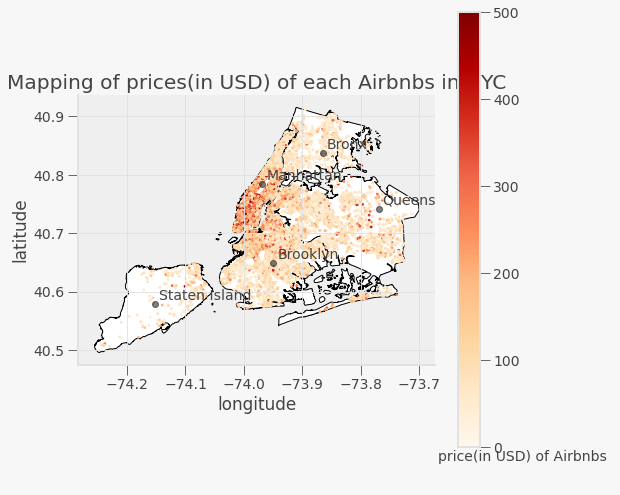

In [38]:
fig, gax = plt.subplots(figsize = (8,8))

nyc.to_crs("EPSG:4326").plot(ax=gax, color="white", edgecolor="black")

gdf.plot(
    ax=gax, edgecolor='face', column='price(in USD)', legend=True, cmap='OrRd',s = 3,
    vmin=0, vmax=500 
)

gax.annotate('price(in USD) of Airbnbs',xy=(0.76, 0.06),  xycoords='figure fraction')

gax.set_title('Mapping of prices(in USD) of each Airbnbs in NYC')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

df_n = pd.DataFrame({
'Boroughs' : ['Bronx', 'Queens', 'Manhattan' ,'Staten Island', 'Brooklyn' ],
'Latitude': [40.837048, 40.742054, 40.785091, 40.579021, 40.650002],
'Longitude': [-73.865433, -73.769417, -73.968285, -74.151535,-73.949997] 
})
df_n["Coordinates"] = list(zip(df_n.Longitude, df_n.Latitude))
df_n["Coordinates"] = df_n["Coordinates"].apply(Point)
gdf_n = gpd.GeoDataFrame(df_n, geometry="Coordinates")

gdf_n.plot(ax=gax, color='black', alpha = 0.5)

for x, y, label in zip(gdf_n['Coordinates'].x, gdf_n['Coordinates'].y, gdf_n['Boroughs']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

*Figure 2-4: Mapping of prices(in USD) of each Airbnbs in NYC*

In the map, NYC is divided into 5 neighbourhood group and the points reflects the price of Airbnb. It is easy to observed that there are more aribnb's with higher price in the neighbourhood group of `Manhattan`. `Manhattan` also has the highest density of Airbnbs.

### Project 2 Summary

As analized in Project 2, both `review_per_month` is correlated with an Airbnb's `price`, and the correlation varies in subgroups based on `room_type` or `neighbourhood_group`. 

Additionally, in each `neighbourhood_group`, under the same `reviews_per_month`, Airbnbs of type `Entire home/apt` usually have the highest price and `Shared room` have the lowest price. 

Genenrally the price of an Airbnb is expected to be higher if it has a lower `reviews_per_month` in NYC. `Manhattan` where has greater density of Airbnbs and Airbnbs with higher price occur more frequently, is special since only in this neighbourhood group that the price of an Airbnb is expected to be higher when the `reviews_per_month` is higher. 

# Project 3
## Introduction
In economics, to dermine the price of a good or service we need to consider both of its supply and demand. In the previous part, `review_per_month`, `room_type` and `neighbourhood_group` are variables that related to the demand of Airbnbs. In this part `Income % for Median Rent` is introduced as a variable that reflect the supply of Airbnb. `Income % for Median Rent` indicates the ratio between the median of household income and the median of rent in an area. If the rent takes a higher ratio in the income, it indicates a relative higher rent and the householder would prefer to rent out the place rather than manage as an Airbnb. 

New data comes from scraping the table `RentHop New York Two Bedroom Median Rent Affordability` from the [NY curbed website](https://ny.curbed.com/2017/8/4/16099252/new-york-neighborhood-affordability).Since the data is gathered at a fixed point in the website, we don't need to run the program over time to renew the data. Due to the structure of data source [website](https://ny.curbed.com/2017/8/4/16099252/new-york-neighborhood-affordability), using `Beautiful Soup` will face the issue of external database. Thus, the [website of the table](https://www.renthop.com/study/assets/new-york-city-cost-of-living-2017/nyc-2br-median-rent-and-income-table.html) is addressed from the inspect of original website, and `webdriver` from `selenium` is used to do the HTML-based scraping for this data.

### Website Scraping

In [ ]:
from selenium import webdriver

# Initialize the webdriver.
driver = webdriver.Chrome('/usr/local/bin/chromedriver')

Based on the type and version of browser, the `webdriver` need to be download seperately during the installation of `selenium`. 

In [ ]:
# Navigate the target table page. The link to the table page can be found in the inspect of NY curbed website. 
driver.get("https://www.renthop.com/study/assets/new-york-city-cost-of-living-2017/nyc-2br-median-rent-and-income-table.html")

# Get elements representing rows in the table.
row_list = driver.find_elements_by_css_selector("tr")

Due to the special structure of NY curbed website, the table is saved in a link to renthop website which can be found in the inspect of NY curbed website. Then we use the webdriver to find the rows of table from renthop website and using `tr` as the key. 

In [ ]:
# A place holder for the table.
table = list()

# For each row of the table.
for row in row_list:
    # Identify each column (element) of the current row.
    element_list = row.find_elements_by_css_selector("td")
    # For each element of the current row, get the associated text and remove extra signs.
    current_row = list()
    for x in element_list:
        current_row.append(x.text.replace('%', '').replace('$', '').replace(',', ''))
    # If the current row is in the table.
    if len(current_row) == 6:
        table.append(current_row)

# Convert everything to a dataframe.
RentHop = pd.DataFrame(table)

Once we start to scrape the content in each row by for loop, we build a new place to save them, and convert them into the form of datafram after we finish scraping.  

In [ ]:
#clean the data
col = [2,3,4,5]
RentHop[col] = RentHop[col].astype(float)
RentHop.rename(columns={0: 'neighbourhood',1: 'neighbourhood_group', 2:'Two-Bedroom Median Rent',3:'Median Household Income',4:'Income % for Median Rent',5:'Income Required to Lease'}, inplace=True)
RentHop.info()

### Merge Table
Varible `Income % for Median Rent` will be added to our dataset in the previous part based on `Neighborhood`(`neighbourhood` in our dataset). The mean of `Income % for Median Rent` in each `Borough` will be added to our dataset based on `Borough`(`neighbourhood_group` in our dataset) for further analysis.

In [ ]:
RH_ngh = RentHop[['neighbourhood','Income % for Median Rent']]
Rh_B_mean = RentHop[['neighbourhood_group','Income % for Median Rent']].groupby('neighbourhood_group').mean()


df.rename(columns={"price(in USD)": "price"}, inplace = True)
df3 = pd.merge(df[df.price < 500], RH_ngh, on = 'neighbourhood', how = 'left')
df3.rename(columns={"price": "price(in USD)"}, inplace = True)
df3 = df3.dropna(subset=['Income % for Median Rent'])
df3.rename(columns={'Income % for Median Rent':'income_per_rent'}, inplace=True)
df3 = pd.merge(df3, Rh_B_mean, on = 'neighbourhood_group', how = 'left')
df3.rename(columns={'Income % for Median Rent':'per_rent_borough'}, inplace=True)
df3.info()
df3.to_csv('ab_NYC_fixed.csv', index=False)

In [ ]:
import seaborn as sns

ax = sns.distplot(RentHop['Income % for Median Rent'], hist=True, kde=True, 
             bins=int(180/5), color = 'midnightblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

ax.set_title('Histograme of income % for median rent on amount of Airbnbs in each neighbourhood of NYC')
ax.set_xlabel('Income % for Median Rent')
ax.set_ylabel('Density')

*Figure 3-1: Histograme of income % for median rent on amount of Airbnbs in each neighbourhood of NYC*

The variable `Income % for Median Rent` shows the mean of rent takes how much percentage in people's income in a specific area. The histograme indicates that if mean of rent takes higher ratio in people's income, the amount of Airbnbs in that area decrease. This shows the fact that when rents become relatively high in comparision to wage in an area, the supply of Airbnbs in this area decrease since renting out the house directly provide more profit for house owner. 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df3['income_per_rent'], df3['price(in USD)'],color = 'midnightblue')

z = np.polyfit(df3['income_per_rent'], df3['price(in USD)'],1)
p = np.poly1d(z)
ax.plot(df3['income_per_rent'],p(df3['income_per_rent']),"r--")

ax.set_title('Scatter plot of income % for median rent on prices of each Airbnbs in NYC')
ax.set_xlabel('income_per_rent')
ax.set_ylabel('price(in USD)')
plt.show()

*Figure 3-2: Scatter plot of income % for median rent on prices of each Airbnbs in NYC*

The graph above shows a positive relationship between the income percentage in median rent and the price of an Airbnb in that area. Which indicates that as rent become a greater percentage in income in an area, the price of Airbnb in this place is likely to raise as well. 

### Summary and Conclusion(Project 3)
We aim to used this analysis to provide help for Airbnb owners pricing their properties to get higher profit, and provide help for travellers to find the most suitable short-term residence during their trips. It is also necessary to identify as much key variables as we can, since when more related information of an Airbnb is approached, more traveller's demand can be met and generate more surplus for travellers. From project 1 to project 3 we step by step further the analysis on the relationship between an Airbnb's reviews per month and its price in order to build a model for pricing.

In Project 1, we visualized the distribution of prices or Airbnbs in each neighbourhood and for different type of rooms. Project 1 also indicated that for all Airbnbs in NYC, a higher review frequency usually implies a lower price. **The negative realtionship between review frequency and price stands generally for all types of room and all neighbourhood groups.**

In Project 2, since we want to make the analysis result applicable to more people, we narrowed the size of dataset and only take the samples with price less than 500 USD. The negative relationship between reviews_per_month and price still stands for the dataset, however, when we divided the data into groups based on neighbourhood groups, the relationship change to positive only in Manhattan. Though the visualization process, it is also observed that in all neighbourhood groups, different type of room have different price and private. **Thus, the effect of room type and neighbourhood group should be considered while analysing the relationship between reviewing frequency of an Airbnb and its price.**

In Project 3, we obtained more information through web scraping. While the previous two projects focus on the feature that effect the demand of Airbnbs, Project 3 focus on the effect of Airbnbs' supply. We divided the neighbourhood groups into smaller neighbourhoods and use the pecentage of income on median rent in an area to reply the supply of Airbnbs. If the rent values a higher pencentage in comparison with wage, householders will increase the supply of renting out places and reduce the supply of its subsitute good -- Airbnbs. While the demand stay stills, an decrease in supply would increase the price of goods or services. **Thus, the effect of median rent in percentage of wage in an area should also be considered while analysing the relationship between reviews per month of an Airbnb and the price of it.**

These three projects indicates variables that also have effect on an Airbnb's price beside review_per_month. These variables are closely related to the welfare that people can get in the market of Airbnbs, which is a key representation for "Sharing Economics" in nowadays society. For further analysis, Linear regression and machine learning process will be added in order to figure out an more precise relationship between price and review frequency while there are effects from other effective variables.

# Final Project
## Introduction(Updated from all previous projects)
In nowadays society, sharing economics has become more and more related to our daily life. In Sung Eunsuk’s work in 2018, the word sharing indicates the activities that people maximize the utilization of unused by sharing the good or services with orders. Airbnb is a website that run as a platform for short-term house or room rental information. It represents the idea of "sharing economics" by making the host make profit from their spare room or house, and providing more choice for travelers to choose their short-term residence (Ke 2017, Quattrone et al. 2016). It is one of the the most famous representation(Dudás, Vida, Kovalcsik, & Boros, 2017) and is a primary case for analysis sharing economics and P2P accommodations (Oskam–Boswijk  2016). 

In existing researches, researchers indicates that price of Airbnb is related with its location and room type in Bristol(Voltes-Dorta & Sánchez-Medina, 2020). While in New York City,  Airbnbs closer to boroughs with younger population are more popular than those in other neighborhood groups(Dudás, Vida, Kovalcsik, & Boros, 2017). With existing literature, this research aim to build the demand model that can be used to estimate a reasonable price based on the quantity demand of Airbnbs in New York City. Both room type effect and location effect are evaluated for the price estimation model.  In order to prevent endogeneity cause by the correlation between location and quantity demand, new data of location effect that scrape from websites is introduced.  The estimation model can not only be used for price estimation for currently existing Airbnbs, but can also used for new Airbnbs’ price prediction.

In this research paper, data from Kaggle of  Airbnb’s prices and related information gathered in NYC(Dgomonov, 2019) is used to analysis the relationship between the an Airbnb’s price and it’s monthly reviewing frequency. Variable `reviews_per_month` in the dataset reflect the market and popularity of an Airbnb among travelers. Thus, by analysing the relationship between `review_per_month` and `price`, this project indicates the demand curve of Airbnbs in New York City.

During the analysis between variables, we realized that there are some Airbnbs with luxury prices. Since this report aims to provide more information for most travelers and Airbnb hosts, only Airbnbs with price lower than 500USD will be considered for analysis. After we analysed the relationship between all possible independent variables in the dataset and `prices`, we narrowed down the supporting informative variables including `room_type` and `neighbourhood_group` to divide the data into subgroups for further analysis of relationship between Airbnbs' prices and an airbnb's `reviews_per_month`. Web scraping introduced another variable to represent additional location effect of price. The neighbourhood groups is divided into smaller neighbourhoods and we will use the percentage of income on median rent in an area to test for effect on price as well. 

We want to used a model to see how the price of an Airbnb varies with its monthly review frequency while holding other un-ignorable variables stays the same. While holding other variable constant, Airbnbs' owners and travelers can compare the effect of one specific variable more clearly. Therefore, A  model of Airbnbs' prices will be generated while considering `review_per_month` as the main effect, `room_type`, `neighbourhood_group` and `Income % for median rent` are also effective variables to prices. 

We start from modeling the main interested variable `reviews_per_month` first, and then gradually add other related variables including `neighbourhood_group`,`room_type` and `Income % of median rent`. We expect to see the value of $R^2$ increase as more variables are adding, since increasing in $R^2$ indicates that more feature of the sample is captured by the model, and is able to provide better prediction for people to use in their real life. When there are two models with similar $R^2$, Akaike information criterion(AIC) and Bayesian information criterion(BIC) will also be considered. The best estimation model is selected firstly based on having greatest $R^2$, and then by having smallest AIC and BIC. This model will help owners to evaluate and earn more profit from their properties based on their properties' feature, help travellers to maximize thier surplus based on their preference while choosing Airbnbs and provide information for govenments to supervise local market of Airbnbs.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(df3['reviews_per_month'], df3['price(in USD)'],color = 'midnightblue')

z = np.polyfit(df3['reviews_per_month'], df3['price(in USD)'], 1)
p = np.poly1d(z)
ax.plot(df3['reviews_per_month'],p(df3['reviews_per_month']),"r--")

ax.set_title('Scatter plot of reviews per month on prices(in USD) of each Airbnbs in NYC')
ax.set_xlabel('reviews_per_month')
ax.set_ylabel('price(in USD)')
plt.show()

*Figure 4-1: Scatter plot of reviews per month on prices(in USD) of each Airbnbs in NYC*

To be noticed that the sample size varies after we merge and add new variables. Some samples are lost as we merge the table. However, there are 14811 samples which is still a big sample size for analizing the feature of interested variables by regression model. 

After we generate the new usable dataset, the scatter plot of `price(in USD)` on `review_per_month` indicates a negative trend of price as the monthly review frequency increase, which is consistent with the analysis in project one. This is also consistent with the downward sloping model of demand in economics if monthly review frequency is considered as a representation of demand quantity. Thus, even the scatter points are not evenly distributed around the regresion line, relationship between `review_per_month` and `price(in USD)` still can be linear since the model of demand is linear. 

In [ ]:
df3.rename(columns={"price(in USD)": "price"}, inplace = True)
results1 = ols('price ~ reviews_per_month ', data=df3).fit()
print(results1.summary())

*Table 4-1: OLS Regression Result of Model1*

OLS regression is applied to the data set and test for the relationship between `review_per_month` and `price(in USD)`. The outcome indicates that monthly review frequency significantly affect price(P<0.001) and if there is one more review for an Airbnb, the price of this Airbnb is expected to decrease by 2.62 USD than other Airbnbs. 

However, the $R^2$ is only 0.003 which indicates that only 0.3% of the sample can be explained by this model. As the scatter plot indicates that the density of Airbnbs with lower monthly review frenquency is higher than the density of those with higer monthly review frequency. Thus, more informative variables are supposed to be introduced to explain more variance in the model. 

In project 2 and project 3, analized variables including location of an Airbnb, the room type of an Airbnb and the local income percentage in median of rent are informative for people to make decisions on evaluate Airbnbs, and these variables also have effect on the price of an Airbnb. Among these effective variables, neighbourhood group and room type are categorical variables which can be used as dummy variables to explain some variance in the sample caused by groups. Income percentage in median rent is introduced in two ways:
1. Introduced as a numerical variable.
2. Introduced as a categorical variable based on the value of it(value > 100 : `rent_high` = 1, otherwise : `rent_high` = 0). 

Including the regression between `reviews_per_month` and `price(in USD)`, five models are built with interesed variables that affect an Airbnb's price for comparison and selection of the most appropriate model. 

$$
\begin{align*}
\text{Model1: }\widehat{\text{price(in USD)}}_i &= \beta_0 +\beta_1\times \text{reviews_per_month}\\
\text{Model2: }\widehat{\text{price(in USD)}}_i &= \beta_0 +\beta_1\times \text{reviews_per_month}_i+\beta_{2j} \times \text{neighbourhood_group}_{ij}\\
\text{Model3: }\widehat{\text{price(in USD)}}_i &= \beta_0 +\beta_1\times \text{reviews_per_month}_i+\beta_{2j} \times \text{room_type}_{ij}\\
\text{Model4: }\widehat{\text{price(in USD)}}_i &= \beta_0 +\beta_1\times \text{reviews_per_month}_i+\beta_{2j} \times \text{room_type}_{ij} + \beta_3\times  \text{income_per_rent}_i\\
\text{Model5: }\widehat{\text{price(in USD)}}_i &= \beta_0 +\beta_1\times \text{reviews_per_month}_i+\beta_{2j} \times \text{room_type}_{ij} + \beta_{3} \times \text{rent_high}_{i}\\
\end{align*}
$$

From Model 1-5 independent variables are tested and adding gradually in order to see how the model is improved due to the changing of a variable or adding a new variable. We expect to see $R^2$ increase as more variables are adding and the relationship between price and monthly review frequency remains negative. In other words, model1-6 step by step test and select variables  to improve estimation ability of each model. Model with greater ability of estimation helps owners to earn more profit from their properties based on their properties' feature, helps travelers to maximize thier surplus based on their preference while choosing Airbnbs and provides information for governments to supervise local market of Airbnbs. 

In [ ]:
df3.loc[df3['income_per_rent'] <=100, 'rent_high'] = 0
df3.loc[df3['income_per_rent'] > 100, 'rent_high'] = 1
results2 = ols('price ~ reviews_per_month + C(neighbourhood_group)', data=df3).fit()
results3 = ols('price ~ reviews_per_month + C(room_type)', data=df3).fit()
results4 = ols('price ~ reviews_per_month +  C(room_type) + income_per_rent', data=df3).fit()
results5 = ols('price ~ reviews_per_month +  C(room_type) + rent_high', data=df3).fit()
results6 = ols('price ~ reviews_per_month +  C(room_type) + C(neighbourhood_group) + income_per_rent', data=df3).fit()

from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[results1, results2,results3,results4,results5，results6],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model1',
                                         'Model2',
                                         'Model3',
                                         'Model4',
                                         'Model5',
                                         'Model6'],
                            info_dict=info_dict,
                            regressor_order=['R-squared','Intercept',
                                             'reviews_per_month'])

results_table.add_title('Table 4-2 - OLS Regressions Summaries for Model 1-6')

print(results_table)

*Table 4-2: OLS Regressions Summaries for Model 1-5*

Table 4-2 summarize the coefficient of linear regression model1-6. The value of $R^2$ increase in as more variables are added. Model1 and model3 are not selected as the best model due to their lower $R^2$ value. Model2 is eliminated not only because it has less $R^2$, but also because the endogenity cause by the correlation between `review_per_month` and `neighbourhood_group`. As Dudás demonstrated in his work in 2017, people pay more attention to those Airbnbs that is close to neighbourhood with more younger generation or flourishing boroughs. The edogenity cause the negative relationship betwenn `review_per_month` and `price`inconsistent. In model4 and model 5, income percentage of median rent is used to replace `neighbourhood_group` as the location effect to price. Model4 and model 5 shares the greatest $R^2$, thus we print their detailed result to see value of 3-decimal $R^2$, Akaike information criterion(AIC) and Bayesian information criterion(BIC) of each model. 

In [ ]:
print(results4.summary())
print(results5.summary())

Through the regression summary of model4 and 5, model5 is selected since it has slightly greater$R^2$ and has less BIC than model4(1.654e+05<1.655e+05). Thus, the estimates of price, which is also the demand funtion can be conclude as:

$$
\begin{align*}
\widehat{\text{price(in USD)}}_i &= 172.86 -0.80\times \text{reviews_per_month}_i -94.75\times \text{room_type}_{Private}-118.52\times \text{room_type}_{Shared} + 11.62 \times \text{rent_high}_{i}\\
\end{align*}
$$

All other independent variables show significance in estimating `price`. $R^2 = 0.358$ indicates that 35.8% of the sample variance is captured in the model. In model6, Airbnbs with room type of `Entire house` and `rent_high` = 0 are set as base case. Togethered with `Intercept`, we can interpret that for an entire house Airbnb in a neibourhood that median rent won't exceed people's wage with no one review it in the previous month, its price is expected to be 172.86USD. 

Holding other monthly review frequency and income percentage of median rent the same, room type of an Airbnb switch from `Entire room` to `Private room` is expected to be 94.75USD lower in price(p<0.01), switch from `Entire room` to `Shared room` is expected to be 118.52USD loewr in price. If the local median rent exceed people's wage(`rent_high` = 1), the price of Airbnbs in such neighbourhood is expected to be 11.62USD higher(p<0.01) than other Airbnbs with same value in other independent variables.

While holding other variables the same, monthly review frequency shows negative relationship with an Airbnb's price in-cooperate with other variables. For one more review in a month, the data provide weak evidence that the price is expected to be 0.81USD(p = 0.017) lower. 

## Conclusion(Updated from all previous projects)
In this research we improve the OLS model for Airbnb’s price in Bristol by introducing new data scarped from websites, and applied it in New York City. We build a model to estimate price based on the monthly review frequency of an Airbnb in New York City. This is also the demand curve model of  Airbnbs in New York City since monthly review frequency can be considered as quantity demand. We aim to used this analysis to provide help for Airbnb owners pricing their properties to get higher profit, provide help for travelers to find the most suitable short-term residence during their trips, as well as be supportive for governments’ regulation.

The model shows a negative relationship between an Airbnb’s price and its popularity, which is consistent with the model of demand curve in economics. The model also conclude effective location effect and room type effect which is consistent with existing research on Airbnbs’ price in Bristol. As an improvement of the Bristol model based on possible endogeneity, we use the dummy variable that indicates whether local median rent exceed people’s wage to represent location effect on price instead of using dummy variables of administrative borough. 

Start from the beginning, we step by step build the model on the relationship between an Airbnb's reviews per month and its price. At first, the distribution of prices or Airbnbs was visualized based on each neighbourhood group or on different type of rooms. It is indicated that for all Airbnbs in NYC, a higher review frequency usually is expected for a lower price. The negative realtionship between review frequency and price stands generally for all types of room and all neighbourhood groups. This is consistent with the general demand curve model.

After that, since we want to make the analysis result applicable to more people, we narrowed the size of dataset and only take the samples with price less than 500 USD. The negative relationship between `reviews_per_month` and `price` still stands for the dataset, however, when we divided the data into groups based on neighbourhood groups, the relationship change to positive only in Manhattan. Though the visualization process, it is also observed that in all neighbourhood groups, different type of room have different price and privacy. Thus, the effect of room type and neighbourhood group should be considered while analysing the relationship between reviewing frequency of an Airbnb and its price.

To improve the analysis and solve the endogeneity in the regression model, we use the income percentage in median rent instead of the dummy variable of neighborhood group since Airbnbs closer to famous borough are more popular than those in other neighborhood groups. Income percentage in median rent is another effect to price related to location and is independent with travelers decisions. Since if the rent values a higher percentage in comparison with wage, householders will increase the supply of renting out places and reduce the supply of its substitute good -- Airbnbs. Thus, while the demand stay stills, decrease in supply would increase the price of Airbnb and the effect of income percentage in local median rent should also be considered while analysing the relationship between reviews per month of an Airbnb and the price of it.

Together with listed variables that have effect on an Airbnb's price beside `review_per_month`, a linear regression model is generated to estimate an Airbnb’s price. The estimation model captures 35.8% of variance in the sample, and can be used for prediction for Airbnb hosts, for travelers as well as for tourist offices. The model indicates that an Airbnb’s price is expected to be 0.81USD lower than other Airbnbs with same location and room type when the monthly review frequency increase by one. These variables are closely related to the welfare that people can get in the market of Airbnbs, which is a key representation for "Sharing Economics" in nowadays society.

## Future work
We improved and generate a new OLS model for prices, however due to the limitation of available variables, the estimation model still have possible improvement on its accuracy. Airbnb is an online platform which indicates lots of related data can be scraped online. More data from the internet can be scraped and join with Airbnb data for further analysis. Since the original dataset is big(orignally have more than 38000 data, and still have 14811 data after merging with new data) and have both categorical variables and numeric variables, further analysis can be done by implying machine learning methods such as regression tree or random forest. 

Another possible improvement for this research is the using of analysis method. Method using is limited in this research since only quantitative analysis methods are used. For further research, there can be more quantitative analysis such as text analysis on Airbnb’s name or other host-related information.

This paper focus more on the demand side of Airbnb, and focus only in New York City. With the aim of benefit more people in the world, in the future this model can be researched jointly with supply side research as well. There can also be comparison studies between models in New York City and other famous cities around the word and benefit more people in the world.

## Reference
Dgomonov. (2019, August 12). New York City Airbnb Open Data. Retrieved October 3, 2020, from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Dudás, G., Vida, G., Kovalcsik, T., & Boros, L. (2017). A socio-economic analysis of Airbnb in New York City. Regional Statistics, 7(1), 135-151. doi:10.15196/rs07108

Filippas, A., Horton, J. J., & Zeckhauser, R. J. (2020). Owning, Using, and Renting: Some Simple Economics of the “Sharing Economy”. Management Science, 66(9), 4152-4172. doi:10.1287/mnsc.2019.3396

Guttentag, D., Smith, S., Potwarka, L., & Havitz, M. (2017). Why Tourists Choose Airbnb: A Motivation-Based Segmentation Study. Journal of Travel Research, 57(3), 342-359. doi:10.1177/0047287517696980

Ke, Q. (2017). Sharing Means Renting? Proceedings of the 2017 ACM on Web Science Conference - WebSci '17. doi:10.1145/3091478.3091504

Oskam, J., & Boswijk, A. (2016). Airbnb: The future of networked hospitality businesses. Journal of Tourism Futures, 2(1), 22-42. doi:10.1108/jtf-11-2015-0048

Quattrone, G., Proserpio, D., Quercia, D., Capra, L., & Musolesi, M. (2016). Who Benefits from the "Sharing" Economy of Airbnb? Proceedings of the 25th International Conference on World Wide Web. doi:10.1145/2872427.2874815

Sung, E., Kim, H., & Lee, D. (2018). Why Do People Consume and Provide Sharing Economy Accommodation?—A Sustainability Perspective. Sustainability, 10(6), 2072. doi:10.3390/su10062072

Voltes-Dorta, A., & Sánchez-Medina, A. (2020). Drivers of Airbnb prices according to property/room type, season and location: A regression approach. Journal of Hospitality and Tourism Management, 45, 266-275. doi:10.1016/j.jhtm.2020.08.015
